<font size = "5"> **EELS_Tools:  [Spectroscopy](../4_EELS_Tools.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of EDS Spectra
<br>

[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/EELS/EDS.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/EELS/EDS.ipynb)
    
part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package



Notebook by Gerd Duscher, 2023

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

## Content
An Introduction into displaying and analyzing EDS spectrum images and spectra
This works also on Google Colab.


## Prerequesites

### Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [ ]:
import sys
import importlib.metadata

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = -1
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2023.9.9':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/sidpy.git@main -q --upgrade
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/SciFiReaders.git@main -q --upgrade
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade

# ------------------------------
print('done')

**In Google Colab: Please restart runtime Ctrl+M**

### Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets.



In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pylab as plt
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(0, '../../../SciFiReaders')
sys.path.insert(0, '../../')
import SciFiReaders

import pyTEMlib
import pyTEMlib.file_tools     # File input/ output library
import pyTEMlib.eels_tools
import pyTEMlib.eds_tools


if 'google.colab' in sys.modules:
    drive.mount("/content/drive")

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)
__notebook__ = '2_Image_Registration'
__notebook_version__ = '2023_1_20'

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
pyTEM version:  0.2024.01.1


## Open File

### Load File

Select a main dataset and any additional data like reference data and such.

In [2]:
fileWidget = pyTEMlib.file_tools.FileWidget()

### Select and Plot Dataset

Select a dataset from the drop down value and display it with the code cell below.

In [3]:
import h5py
file_name = '..\..\..\Example EDAX.edax.h5'
datasets = fileWidget.datasets
chooser = pyTEMlib.file_tools.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('RCOB-3,5Zn_Area5_LiveMap1_SpectrumImage: RCOB-3,5Zn_Area5_Li…

In [4]:
image_chooser = pyTEMlib.file_tools.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('RCOB-3,5Zn_Area5_LiveMap1_SpectrumImage: RCOB-3,5Zn_Area5_Li…

In [5]:
survey_image_chooser = pyTEMlib.file_tools.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('RCOB-3,5Zn_Area5_LiveMap1_SpectrumImage: RCOB-3,5Zn_Area5_Li…

sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<array, shape=(400, 512, 1500), dtype=uint8, chunksize=(400, 512, 655), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  distance (nm) of size (400,)
y:  distance (nm) of size (512,)
energy_scale:  energy (eV) of size (1500,)
 with metadata: ['experiment']

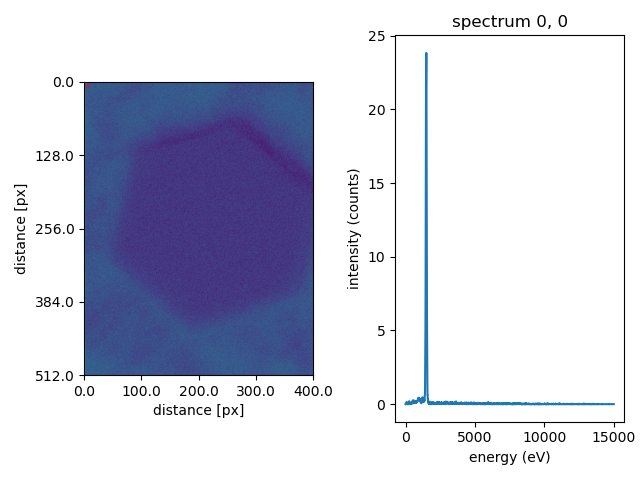

In [33]:
v = chooser.dataset.plot()
chooser.dataset.view.set_bin(8)
chooser.dataset

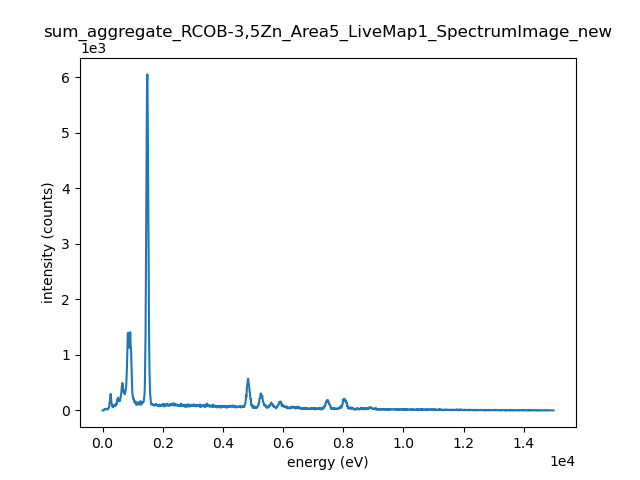

In [861]:
spectrum = chooser.dataset[200:230, 200:230].sum(axis=[0,1])
spectrum.data_type = 'spectrum'
v = spectrum.plot()

In [117]:
 chooser.dataset.metadata['experiment']['detector']

{'live_time': array([1310.72], dtype=float32),
 'tilt_angle': array([45.], dtype=float32),
 'take_off_angle': array([73.17], dtype=float32),
 'resolution': array([124.43575], dtype=float32),
 'Al_thickness': array([3.e-08], dtype=float32),
 'Be_thickness': array([0.], dtype=float32),
 'Par_thickness': array([0.], dtype=float32),
 'Au_thickness': array([3.e-08], dtype=float32),
 'Si_dead_layer_thickness': array([3.e-08], dtype=float32),
 'Si_live_thickness': array([0.05], dtype=float32),
 'x_ray_incident_angle': array([3.8146973e-06], dtype=float32),
 'azimuth_angle': array([29.], dtype=float32),
 'elevation_angle': array([32.], dtype=float32),
 'b_coefficient': array([0.6055], dtype=float32),
 'c_coefficient': array([1.], dtype=float32),
 'start_channel': 10,
 'detector_efficiency': array([0.        , 0.        , 0.        , ..., 0.99096775, 0.99098292,
        0.99099808])}

[15000.]


([<matplotlib.lines.Line2D at 0x27c744efdd0>],)

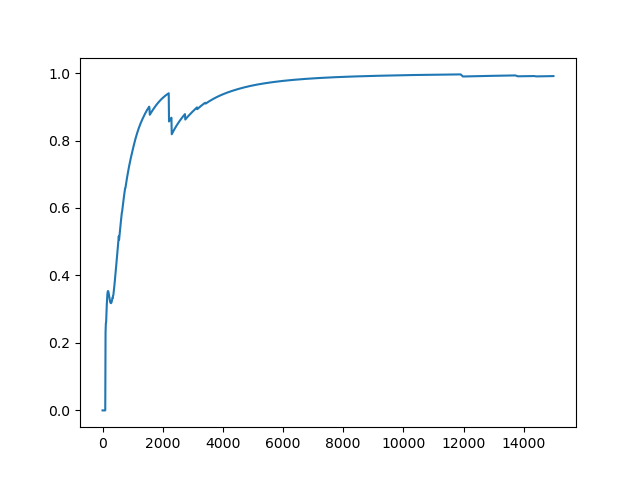

In [862]:
tags = chooser.dataset.metadata['experiment']

tags['acceleration_voltage_V'] = tags['microscope']['acceleration_voltage_V']
print(tags['acceleration_voltage_V'])
start = np.searchsorted(spectrum.energy_scale, 150)
detector_efficiency = np.zeros(len(spectrum))
detector_efficiency+= pyTEMlib.eds_tools.detector_response(spectrum)
plt.figure()
plt.plot(spectrum.energy_scale, detector_efficiency), 

## Fit Spectrum


[1.36e+02 1.57e+02 1.00e+07 1.00e-03 1.50e+03 2.00e+01] [1.51626177e+02 1.16313371e+02 2.52187065e+10 3.51033293e+00
 5.03605001e+06 9.76317794e+00]
[2.52187065e+10 3.51033293e+00 5.03605001e+06 9.76317794e+00]


(array([2.52187065e+10, 3.51033293e+00, 5.03605001e+06, 9.76317794e+00]),
 15000.0)

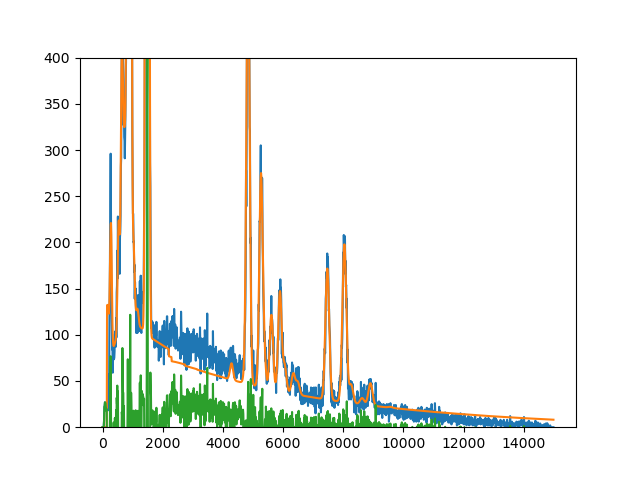

In [1134]:
elements = ['C', 'O', 'Cu',  'Al',  'Ni', 'Zn', 'Mn', 'Ce']
spectrum.metadata['EDS'] = {}
pyTEMlib.eds_tools.get_x_ray_lines(spectrum, elements)
peaks, p = pyTEMlib.eds_tools.fit_model(spectrum, elements, use_detector_efficiency= True)
model = np.zeros(len(spectrum))
for i in range(len(p)-4):
    model += peaks[i]*p[i]
    pass
start = np.searchsorted(spectrum.energy_scale, 150)
energy_scale = spectrum.energy_scale[start:]
#p[-3:] = [100, 3, .007]
print(p[-4:])
E_0 = spectrum.metadata['experiment']['acceleration_voltage_V'][0]

#model[start:] += (detector_efficiency[start:] * (p[-3] + p[-2] * (E_0 - energy_scale) / energy_scale + p[-1] * (E_0-energy_scale) ** 2 / energy_scale))
bgd = p[-4] / (energy_scale + p[-3] * energy_scale ** 2 + p[-2] * energy_scale ** .5) - p[-1]

model[start:] += detector_efficiency[start:] * bgd
            
plt.figure()
plt.plot(spectrum.energy_scale, spectrum)

plt.plot(spectrum.energy_scale,model)
# plt.plot(spectrum.energy_scale[start:], bgd*detector_efficiency[start:])
plt.plot(spectrum.energy_scale,spectrum-model)
plt.ylim(0, 400)
p[-4:], E_0

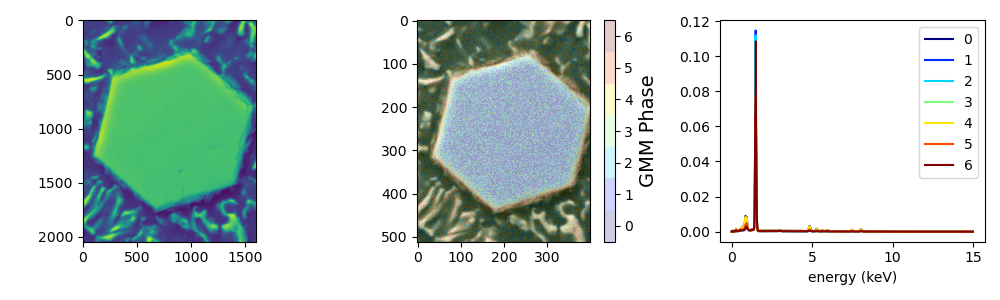

In [1140]:

pyTEMlib.eds_tools.get_phases(chooser.dataset, number_of_phases=7)
fig = pyTEMlib.eds_tools.plot_phases(chooser.dataset, image_chooser.dataset, survey_image_chooser.dataset)

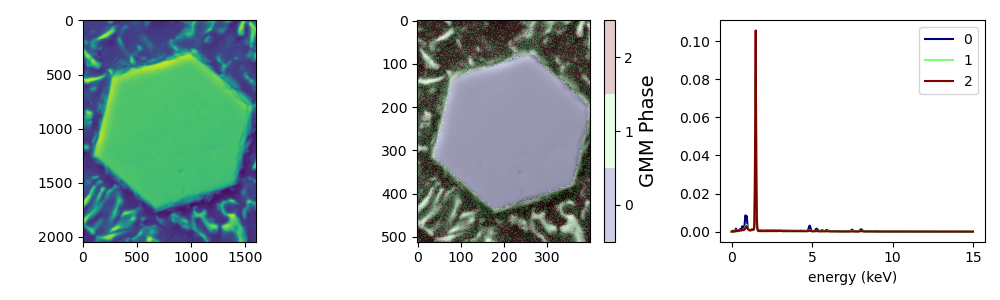

In [1138]:
chooser.dataset.energy = chooser.dataset.energy_scale
fig = pyTEMlib.eds_tools.plot_phases(chooser.dataset, image_chooser.dataset, survey_image_chooser.dataset)

## Spectrum Image
Select the HAADF image reference

In [1142]:

elements = pyTEMlib.eds_tools.find_elements(spectrum, minor_peaks)


NameError: name 'minor_peaks' is not defined